In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = [[10, 15, 20, 25],
     [20, 25, 20, 35],
     [50, 65, 40, 70]]

In [3]:
type(data)

list

In [5]:
data * 10

[[10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70],
 [10, 15, 20, 25],
 [20, 25, 20, 35],
 [50, 65, 40, 70]]

In [0]:
data = np.array(data) # 배열로 변환

In [7]:
data / 2

array([[ 5. ,  7.5, 10. , 12.5],
       [10. , 12.5, 10. , 17.5],
       [25. , 32.5, 20. , 35. ]])

In [8]:
x = data[:,:3]
y = data[:,-1]
x.shape, y.shape

((3, 3), (3,))

In [0]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression() # 객체 생성
model.fit(x, y) # 학습 : 정규방정식을 수행합니다
model.score(x, y) # 결정계수

1.0

In [12]:
model.coef_, model.intercept_ # 계수 3개와 절편 1개

(array([ 5.00000000e-01,  5.00000000e-01, -4.16333634e-16]),
 12.500000000000032)

In [13]:
x_test = [[90, 80, 90]]
x_test = np.array(x_test)
model.predict(x_test)

array([97.5])

In [14]:
x_test = [[0, 10, 100]]
x_test = np.array(x_test)
model.predict(x_test)

array([17.5])

In [0]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(path, sep=';') # 구분자가 ';' 다

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df.shape

(1599, 12)

In [20]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
df.isna().sum().sum() # 누락 확인

0

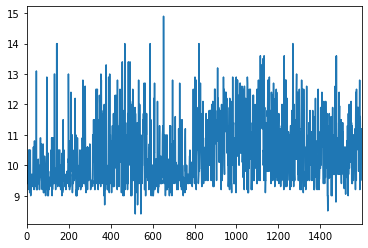

In [22]:
df['alcohol'].plot()

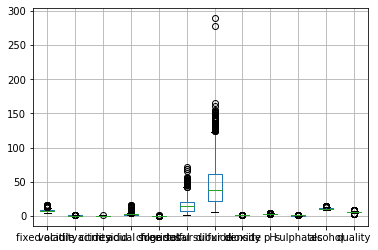

In [23]:
df.boxplot()

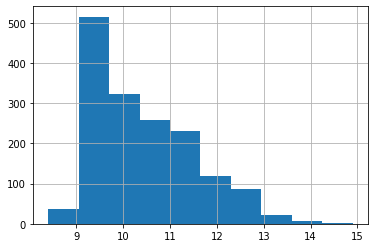

In [25]:
df['alcohol'].hist()

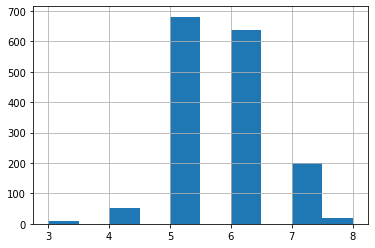

In [26]:
df['quality'].hist()

In [27]:
#데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
df.corr() # alcohol 과 quality의 상관계수가 높다. -> 의미 있다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [0]:
x = df.drop(columns='quality')
y = df['quality']

In [30]:
#25% 는 테스트셋으로 빼자
len(x)

1599

In [31]:
int(len(x) * 0.75)

1199

In [32]:
m = int(len(x) * 0.75)
x = np.array(x)
y = np.array(y)
x_train = x[:m]
x_test = x[m:]
y_train = y[:m]
y_test = y[m:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train) # 학습용으로만 피팅
model.score(x_train, y_train), model.score(x_test, y_test) # 성능 체크 : 과적합, 오버피팅

(0.37829149498341197, 0.27357041362350887)

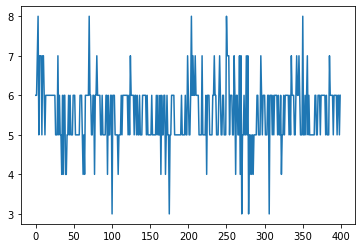

In [38]:
import matplotlib.pyplot as plt
plt.plot(y_test)

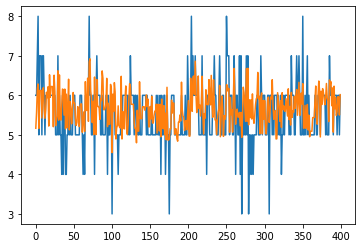

In [39]:
plt.plot(y_test)
plt.plot(model.predict(x_test))

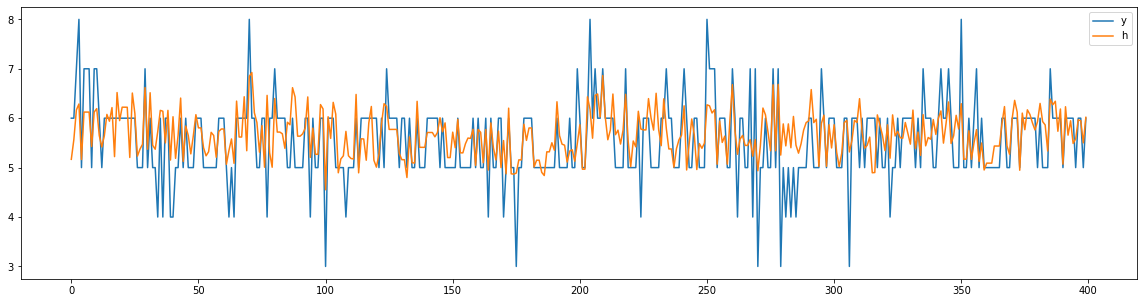

In [42]:
plt.figure(figsize=(20,5))
plt.plot(y_test, label='y')
plt.plot(model.predict(x_test), label='h')
plt.legend()